In [ ]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

root_dir = Path.cwd().parents[1]
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))

from caiman.utils.utils import load_dict_from_hdf5
from matplotlib import pyplot as plt


2025-09-15 12:31:02.653421: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-15 12:31:02.747037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare & display data

40


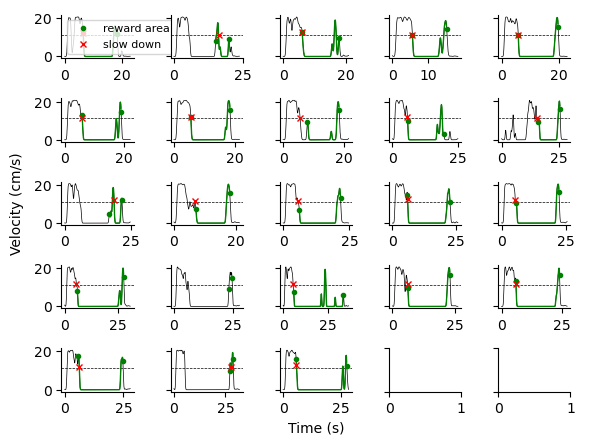

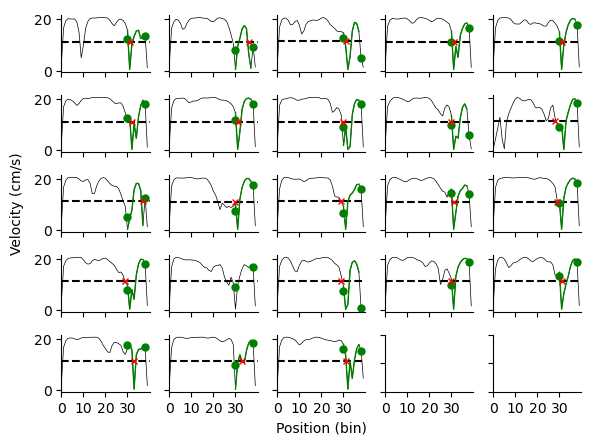

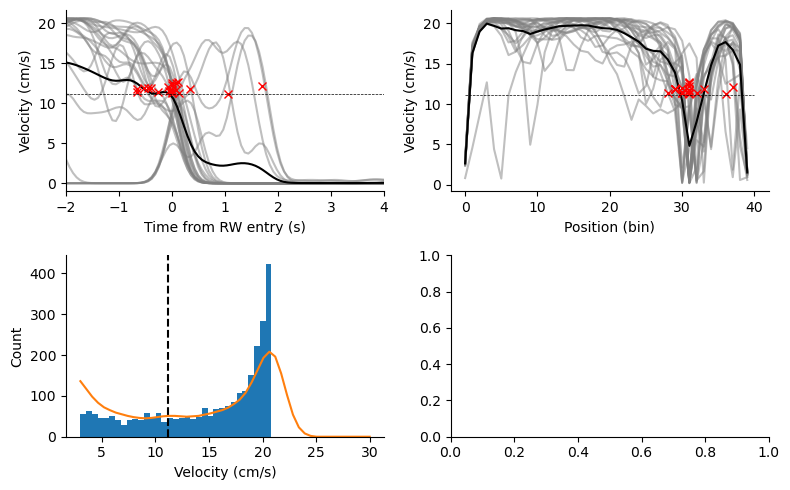

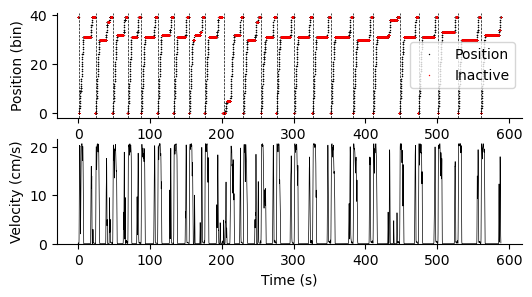

In [2]:
from placefield_detection.utils import prepare_behavior_from_file, plot_behavior

pathMouse = Path("../../../../data/845ad")
pathSession = pathMouse / "Session40"
f = 15.0
nbin = 40
only_active = True

pathBehavior = pathSession / "aligned_behavior.pkl"
behavior = prepare_behavior_from_file(
    pathBehavior,
    only_active=only_active,
    environment_length=120.0,
    nbin=nbin,
    f=15.0,
    T=None,
    calculate_performance=True,
    plt_bool=True,
    plt_trials=True,
)


plot_behavior(behavior)

In [3]:
from placefield_detection.utils import prepare_activity, plot_activity

pathActivity = [
    file
    for file in pathSession.iterdir()
    if (
        file.stem.startswith("results_CaImAn")
        and not "compare" in file.stem
        and "redetected" in file.stem
    )
][0]

ld = load_dict_from_hdf5(pathActivity)

neuron_activity = prepare_activity(
    ld["S"][0, :],
    behavior,
    f=f,
    only_active=only_active,
)

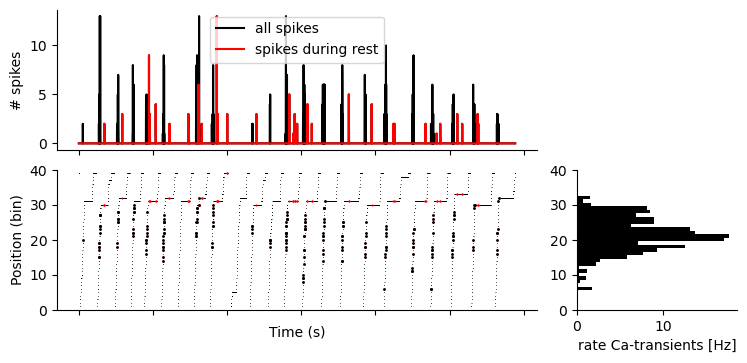

In [4]:
neuron_activity = ld["S"].copy()
activity = prepare_activity(neuron_activity[11, :], behavior, f=15.0, only_active=True)

# from placefield_detection.alternative_detection_methods import (
#     peak_method_batch,
#     information_method_batch,
#     stability_method

plot_activity(activity, behavior, f=f)

## Test Bayes Hierarchical Method

In [137]:
import numpy as np
from placefield_detection.BayesModel import HierarchicalBayesInference
from placefield_detection.HierarchicalBayesModel import (
    parse_name_and_indices,
)
from placefield_detection.HierarchicalBayesModel.NestedSamplingMethods import (
    run_sampling,
)

HBI = HierarchicalBayesInference(logLevel="DEBUG")
HBI.prepare_data(
    activity["map_trial_spikes"],
    behavior["trials"]["dwelltime"],
    iter_dims=False,
    dimension_names=["trials", "position_bins"],
)

n_field = 1
HBI.set_priors(N_f=n_field)

# my_logp = HBI.set_logp_func()
# HBI.nParams

In [147]:
from placefield_detection.HierarchicalBayesModel.structures import (
    build_distr_structure_from_params,
)
from placefield_detection.BayesModel import place_field

p = np.random.rand(HBI.n_params)
my_prior_transform = HBI.set_prior_transform(vectorized=True)
p_transformed = my_prior_transform(p)

params = HBI.get_params_from_p(p_transformed)
build_distr_structure_from_params(params, "field", place_field)

{'fields': [place_field(A=array([[7.67243457]]), sigma=array([[3.5084011]]), theta=array([[30.2375901 , 30.52872391, 28.3055804 , 31.09155201, 29.62845361,
          29.03127792, 30.86349417, 29.75004681, 30.18075693, 31.61657692,
          29.91929449, 29.49489536, 29.38025368, 29.94931647, 30.85203384,
          30.55525473, 30.46093353, 30.62878024, 28.689991  , 29.08154638,
          29.33766399, 30.01174458, 30.73443785]]))],
 'A0': array([[0.17249585]])}

In [ ]:
my_likelihood = HBI.set_logp_func(vectorized=True)
my_likelihood(p_transformed)


"""
write function to build substructure in prior / parameter 
(such as population, placefield, ...)
 * build structure
 * extract structure
 * and build/extract keys accordingly

reimplement wrapping of theta!

change dwelltime_trials to be in toplevel
enable wrapping!!!
"""

DEBUG:nestLogger:time for transforming parameters: 473.7377166748047
DEBUG:nestLogger:time for tuning curve model: 15.020370483398438
DEBUG:nestLogger:time for poisson: 256.7768096923828
DEBUG:nestLogger:time for infield ranges: 76.05552673339844
DEBUG:nestLogger:time for AIC: 144.72007751464844
DEBUG:nestLogger:time for active model: 107.04994201660156
DEBUG:nestLogger:(2, 1, 23, 40) logp_at_trial_and_position=array([[[[-0.05749862, -0.02299945, -0.02299945, ..., -0.03449917,
          -0.02299945, -0.12649696],
         [-0.06899834, -0.02299945, -0.02299945, ..., -0.09199779,
          -0.02299945, -0.18399558],
         [-0.05749862, -0.03449917, -0.02299945, ..., -0.02299945,
          -0.16099613, -0.06899834],
         ...,
         [-0.06899834, -0.02299945, -0.02299945, ..., -0.03449917,
          -0.02299945, -0.08049806],
         [-0.05749862, -0.03449917, -0.02299945, ..., -0.02299945,
          -0.02299945, -0.08049806],
         [-0.06899834, -0.02299945, -0.02299945, ..

{'fields': [place_field(A=array([[7.67243457]]), sigma=array([[3.5084011]]), theta=array([[30.2375901 , 30.52872391, 28.3055804 , 31.09155201, 29.62845361,
        29.03127792, 30.86349417, 29.75004681, 30.18075693, 31.61657692,
        29.91929449, 29.49489536, 29.38025368, 29.94931647, 30.85203384,
        30.55525473, 30.46093353, 30.62878024, 28.689991  , 29.08154638,
        29.33766399, 30.01174458, 30.73443785]]))], 'A0': array([[0.17249585]])}


array([-3071.81958003])

## Test other methods

p_value p_value


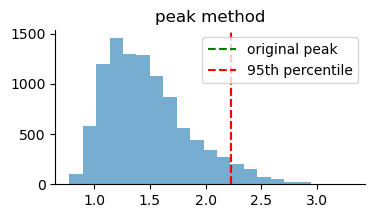

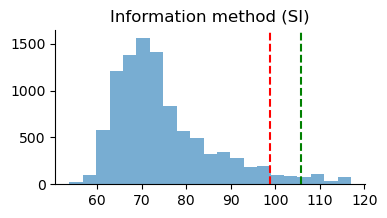

In [6]:
from placefield_detection.alternative_detection_methods import (
    peak_method,
    information_method,
)

neuron = 11
neuron_activity = ld["S"][:, behavior["active"]]
shuffles = 10000
is_pc, p_val = peak_method(
    behavior, neuron_activity[neuron, :], shuffles, False, plot=True
)
is_pc, p_val_info = information_method(
    behavior, neuron_activity[neuron, :], shuffles, False, plot=True
)
print(p_val, p_val_info)

In [7]:
from placefield_detection.alternative_detection_methods import (
    peak_method_batch,
    information_method_batch,
    # stability_method,
)

print(neuron_activity.shape)
# information_method(
#     behavior,
#     neuron_activity[0, :],
#     n_shuffles=10000,
#     plot=True,
# )

# results_info = information_method_batch(
#     behavior,
#     neuron_activity,
#     n_shuffles=10000,
# )
is_place_cell, p_value = peak_method_batch(
    behavior,
    neuron_activity,
    n_shuffles=10000,
)
# stability_method(
#     behavior,
#     neuron_activity,
#     neurons,
#     nbin,
# )

(848, 2855)


100%|██████████| 848/848 [00:51<00:00, 16.53it/s]


TypeError: list indices must be integers or slices, not str

In [ ]:
from placefield_detection.utils import (
    get_firingmap,
    obtain_significant_events_from_one_sided_process,
)

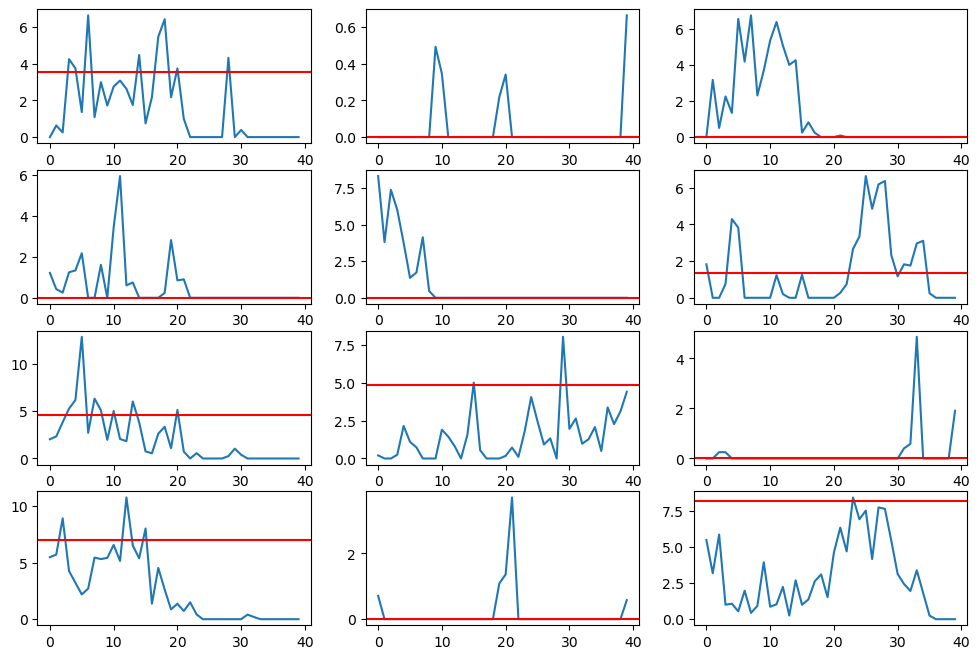

In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(4, 3, figsize=(12, 8))

for neuron in range(12):

    activity = prepare_activity(
        neuron_activity[neuron, :], behavior, f=f, only_active=only_active
    )

    fmap = get_firingmap(
        activity["spikes"],
        behavior["position"],
        behavior["dwelltime"],
        nbin=behavior["nbin"],
    )
    # frate, threshold, _ = get_firingrate(neuron_activity[0,:],IQR=True)
    field, threshold, sd_r = obtain_significant_events_from_one_sided_process(
        fmap, baseline_mode="percentile", sd_mode="iqr", prctile=50
    )
    # print("sd_r:", sd_r)
    # baseline_prc, sd = estimate_stats_from_one_sided_process(fmap, "percentile", "iqr")
    # print("\n")
    # frate, threshold, PF = get_firingrate(fmap, sd_r=-1, IQR=False)
    # frate, threshold_IQR, PF = get_firingrate(fmap, sd_r=-1, IQR=True)

    ax = axes[neuron // 3, neuron % 3]
    ax.plot(fmap, label="firing map")
    ax.axhline(threshold, color="r", linestyle="-", label="threshold")
    # ax.axhline(baseline_prc, color="g", linestyle="-", label="baseline %")
    # ax.axhline(threshold + 2 * sd, color="r", linestyle="--", label="threshold SD")
    # ax.axhline(
    # baseline_prc + 2 * sd_iqr, color="g", linestyle="--", label="threshold SD"
    # )
    # ax.set_title(f"Neuron {neuron}")
    # print(threshold, "vs", threshold_IQR)
    # print(PF)

[[0.         0.         0.         ... 0.         0.04293704 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.02147177 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[       nan        nan        nan ...        nan 0.04293704        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan 0.02147177        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


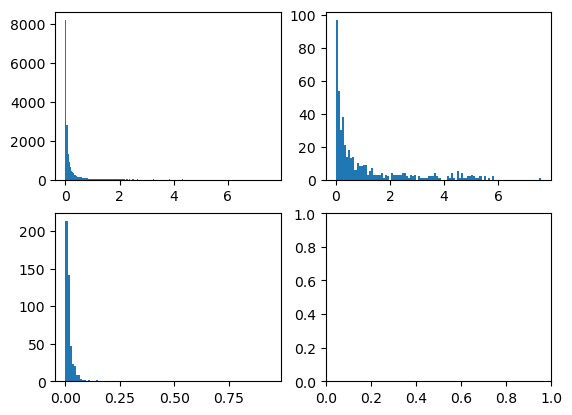

In [49]:
# activity =
import numpy as np

act_masked = np.ma.masked_array(neuron_activity, mask=neuron_activity == 0)
act_masked = np.ma.filled(act_masked, np.nan)
print(neuron_activity)
print(act_masked)
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(neuron_activity[neuron_activity > 0], bins=200)
axes[0][1].hist(np.nanmax(act_masked, axis=1), bins=100)
axes[1][0].hist(np.nanpercentile(act_masked, 20, axis=1), bins=100)
plt.show()

# test namras method

In [9]:
from placefield_detection.alternative_detection_methods.thresholding_pf_method import (
    thresholding_method_single,
    thresholding_method_batch,
)


# print(neuron_activity.shape)
# results = thresholding_method_single(behavior, ld["S"][3, :], plot=True)
results = thresholding_method_single(behavior, neuron_activity[11, :], plot=True)
results
# place_fields = thresholding_method_batch(behavior, neuron_activity, sigma=2)

NameError: name 'neuron_activity' is not defined

In [ ]:
behavior["dwelltime"].shape

(40,)

{}


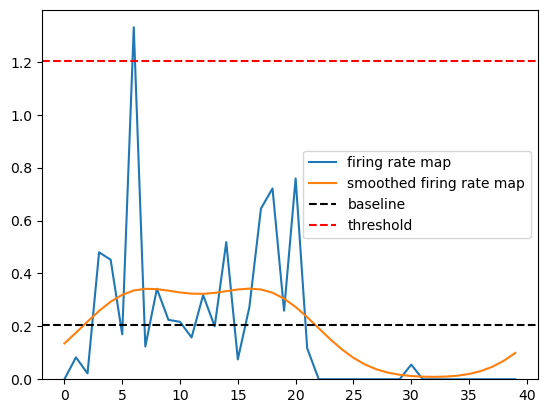

In [118]:
for neuron in range(1):
    field = thresholding_method_single(
        behavior, neuron_activity[neuron, :], threshold_factor=4, sigma=4, plot=True
    )
    print(field)
# field = thresholding_method_single(
#     behavior, neuron_activity[4, :], sigma=2, plot=True
# )
# field